<a href="https://colab.research.google.com/github/pawara101/tensor-flow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions froa regression: Presdecting a numerical value  based on some combinations of variales.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

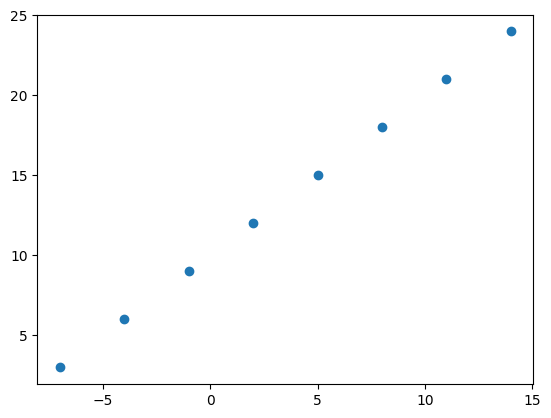

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

## Creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

## Visualize it
plt.scatter(X,y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
## create a demo tensor
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant(9334000)

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=9334000>)

In [12]:
house_info.shape

TensorShape([3])

In [7]:
X[0],y[0]

(-7.0, 3.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [9]:
## Trun our Numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funstion and optimizer and evaluation metrics
3. **Fitting a model** - Letting the model to try

In [13]:
## Set Random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,## Loss function MAE
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


# 3. Fit the model
# model.fit(X,y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # for above tf > 2.7.0

Epoch 1/5
1/1 [==============================] - 1s 652ms/step - loss: 9.4409 - mae: 9.4409
Epoch 2/5
1/1 [==============================] - 0s 30ms/step - loss: 9.3084 - mae: 9.3084
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 9.1759 - mae: 9.1759
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 9.0434 - mae: 9.0434
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 8.9109 - mae: 8.9109


In [15]:
tf.expand_dims(X, axis=-1),y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
## Checkout X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
## Make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 55ms/step


array([[22.740631]], dtype=float32)

## Improving our Model
Can improve the model by altering the steps we took to create a model.
  1. **Creating a model** - Here we might add more layers, add more hidden units, change activation function of each layer.
  2. **Compiling a model** - Change the optimizer or perhaps the learning rate optmization function.
  3. **Fitting a model** - Here fit a model for more *epochs* or on more data

  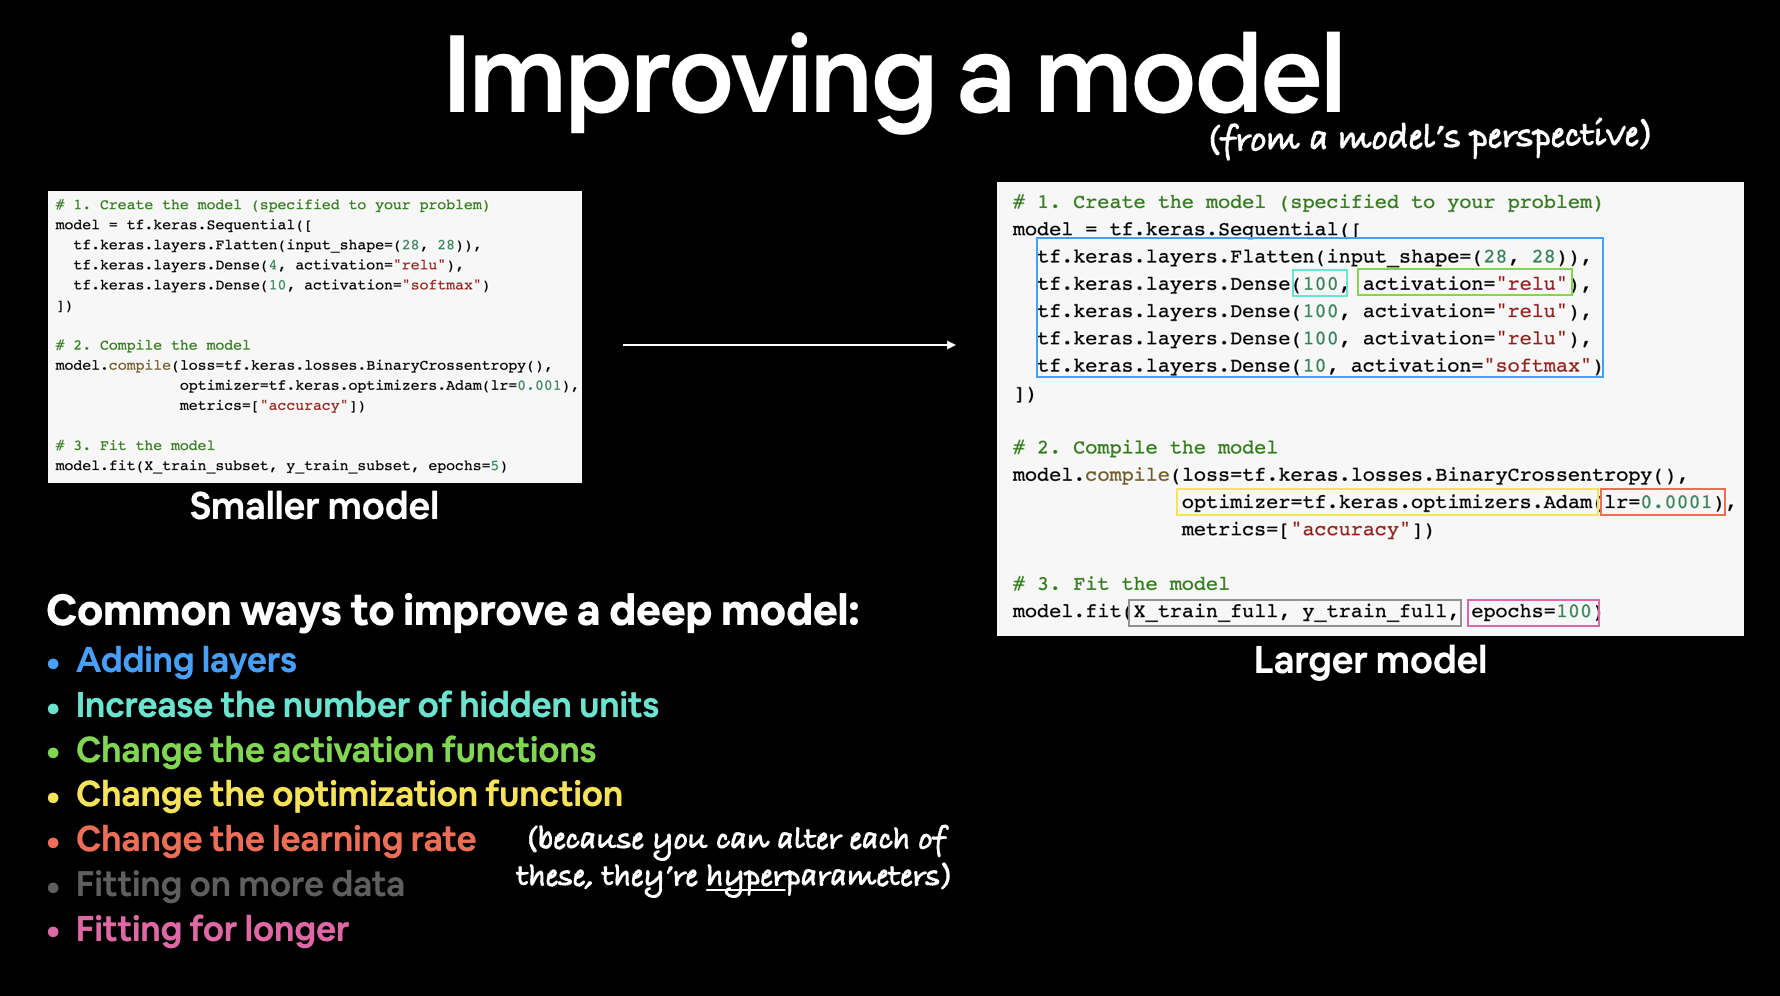


In [ ]:
## Rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model for longer time
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # for above tf > 2.7.0

In [21]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
## Make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 72ms/step


array([[29.399275]], dtype=float32)

In [37]:
## Let's see we can make another change to the model

# 1. Create the model with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model for longer time
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # for above tf > 2.7.0

Epoch 1/100
1/1 [==============================] - 1s 891ms/step - loss: 12.3453 - mae: 12.3453
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6179 - mae: 11.6179
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8800 - mae: 10.8800
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1283 - mae: 10.1283
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.3614 - mae: 9.3614
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5770 - mae: 8.5770
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7721 - mae: 7.7721
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 6.9440 - mae: 6.9440
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9528 - mae: 6.9528
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3035 - mae: 7.3035
Epoch 11/100
1/1 [==============================] - 0s 12ms/

In [38]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [39]:
## Make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[26.076696]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go throygh when building neural network is:


```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

For Evaluation try with Visulaization
 * The data -
 * The model itself
 * The trainning of a model
 * Predictions of the model



In [40]:
## Make a Big data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [41]:
## Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

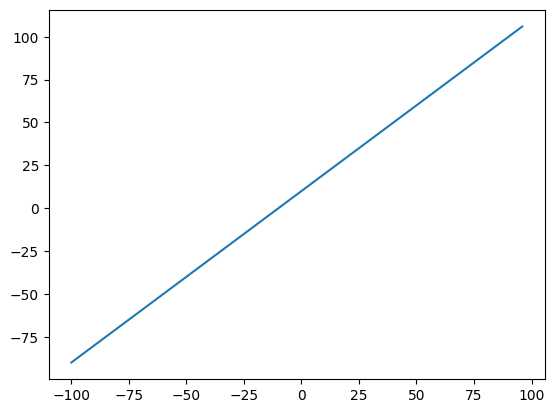

In [42]:
## Visualize the data
plt.plot(X,y)

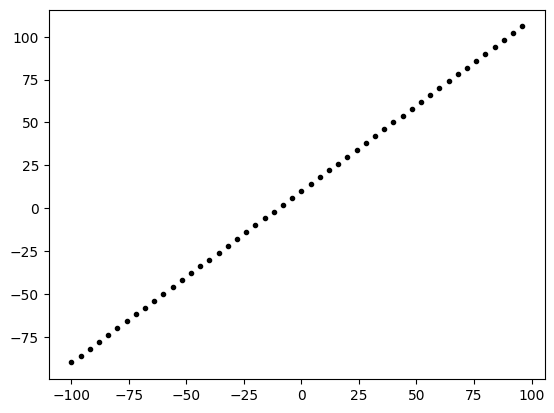

In [48]:
plt.scatter(X,y,marker='.',c='k')

### The 3 sets...

* Trainning set : model learns from this data (typically 70-80%)
* Validation set : model is yuned on this data (typically 10-15%)
* Test set : model get evaluated on this data (typically 10-15%)

In [49]:
# Check the length of how many samples we have
len(X)

50

In [53]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visulasing the data

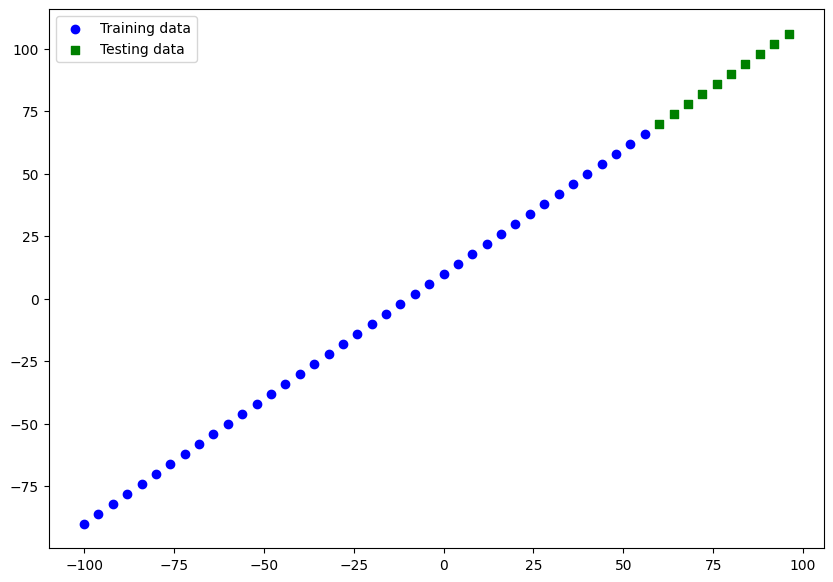

In [57]:
plt.figure(figsize=(10,7))

## Train data
plt.scatter(X_train,y_train,c="b",label='Training data')

## Test Data
plt.scatter(X_test,y_test,c="g",marker='s',label='Testing data')
plt.legend()